In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
test = pd.read_csv("/content/test2024.csv")
train=pd.read_csv("/content/train2024.csv")
test2024 = pd.read_csv("/content/test2024.csv")
train2024=pd.read_csv("/content/train2024.csv")
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

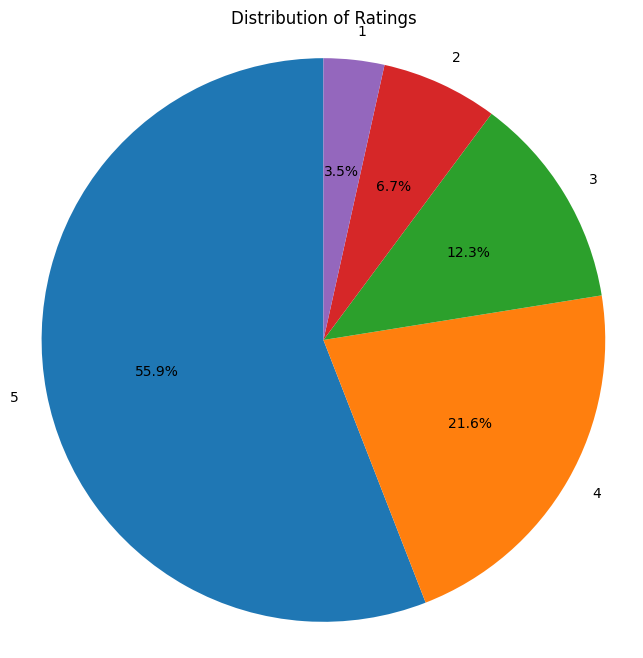

In [ ]:

import matplotlib.pyplot as plt

rating_counts = train['rating'].value_counts()

rating_percentages = (rating_counts / len(train)) * 100

plt.figure(figsize=(8, 8))
plt.pie(rating_percentages, labels=rating_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()



rating  recommended_ind
1       0                  98.251748
        1                   1.748252
2       0                  93.727273
        1                   6.272727
3       0                  58.061325
        1                  41.938675
4       1                  96.511955
        0                   3.488045
5       1                  99.847694
        0                   0.152306
Name: proportion, dtype: float64


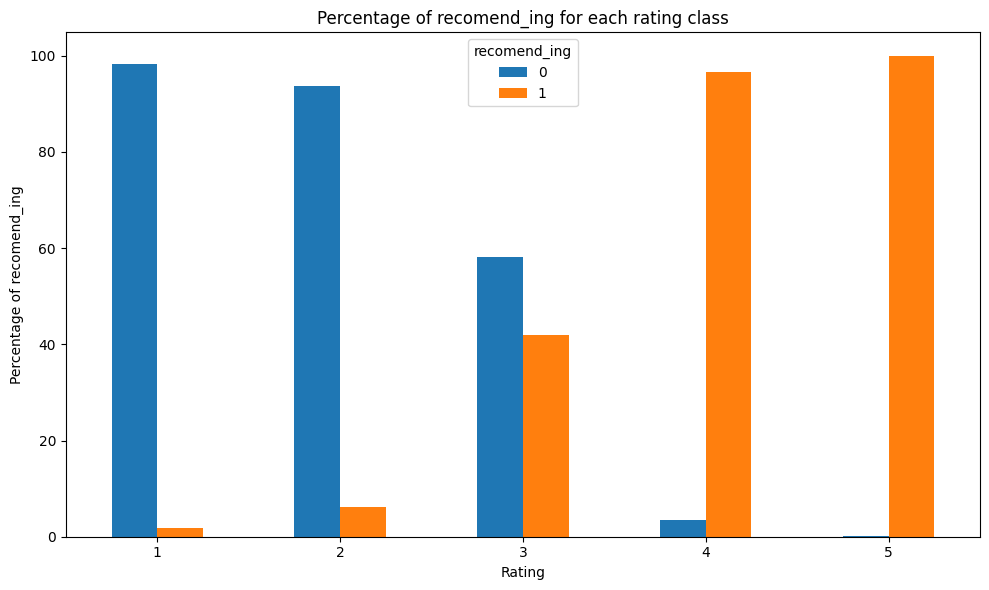

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

rating_recomend_percentages = train.groupby('rating')['recommended_ind'].value_counts(normalize=True) * 100

print(rating_recomend_percentages)



rating_recomend_percentages.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of recomend_ing for each rating class')
plt.xlabel('Rating')
plt.ylabel('Percentage of recomend_ing')
plt.xticks(rotation=0)
plt.legend(title='recomend_ing')
plt.tight_layout()
plt.show()

In [ ]:

average_positive_feedback_per_rating = train.groupby('rating')['positive_feedback_count'].mean()
average_positive_feedback_per_rating

,positive_feedback_count
rating,
1,3.534965
2,3.420909
3,3.125618
4,2.503516
5,2.257180


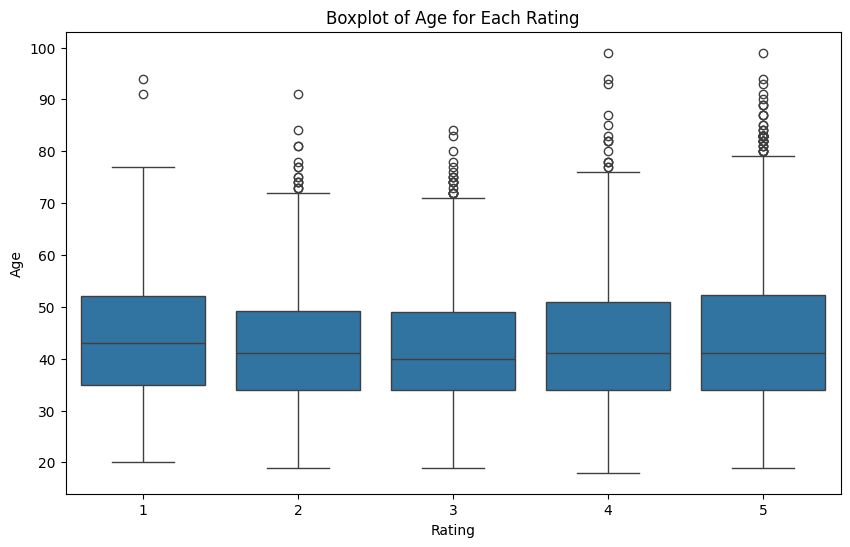

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='age', data=train)
plt.title('Boxplot of Age for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

<Figure size 1500x600 with 0 Axes>

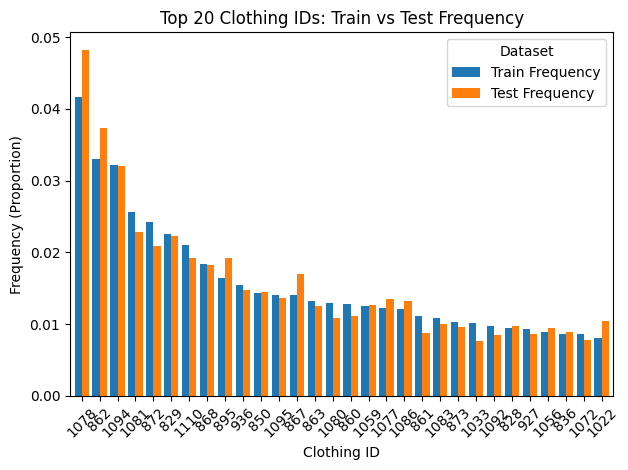

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_clothing_freq = train['clothing_id'].value_counts(normalize=True)
test_clothing_freq = test['clothing_id'].value_counts(normalize=True)

freq_comparison = pd.DataFrame({
    'Train Frequency': train_clothing_freq,
    'Test Frequency': test_clothing_freq
}).fillna(0)  #


plt.figure(figsize=(15, 6))
freq_comparison.sort_values(by='Train Frequency', ascending=False).head(30).plot(kind='bar', width=0.8)
plt.title('Top 20 Clothing IDs: Train vs Test Frequency')
plt.ylabel('Frequency (Proportion)')
plt.xlabel('Clothing ID')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: statistic test to test if there is a relation between the variable rating and categorical variables and i want you to interpret the results

import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

categorical_cols = ['recommended_ind', 'division_name', 'department_name', 'class_name']  # Add other categorical columns

for col in categorical_cols:
    contingency_table = pd.crosstab(train['rating'], train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col}:")
    print(f"  Chi2 statistic: {chi2}")
    print(f"  P-value: {p}")
    print(f"  Degrees of freedom: {dof}")

    alpha = 0.05

    if p < alpha:
        print(f"  There is a statistically significant association between rating and {col}.")
    else:
        print(f"  There is no statistically significant association between rating and {col}.")
    print("-" * 20)



Chi-squared test for recommended_ind:
  Chi2 statistic: 11625.574739820433
  P-value: 0.0
  Degrees of freedom: 4
  There is a statistically significant association between rating and recommended_ind.
--------------------
Chi-squared test for division_name:
  Chi2 statistic: 23.727561927141682
  P-value: 0.002545561742382374
  Degrees of freedom: 8
  There is a statistically significant association between rating and division_name.
--------------------
Chi-squared test for department_name:
  Chi2 statistic: 78.01919800562015
  P-value: 8.492693328569603e-09
  Degrees of freedom: 20
  There is a statistically significant association between rating and department_name.
--------------------
Chi-squared test for class_name:
  Chi2 statistic: 154.44406454408332
  P-value: 2.7850399773924716e-07
  Degrees of freedom: 76
  There is a statistically significant association between rating and class_name.
--------------------


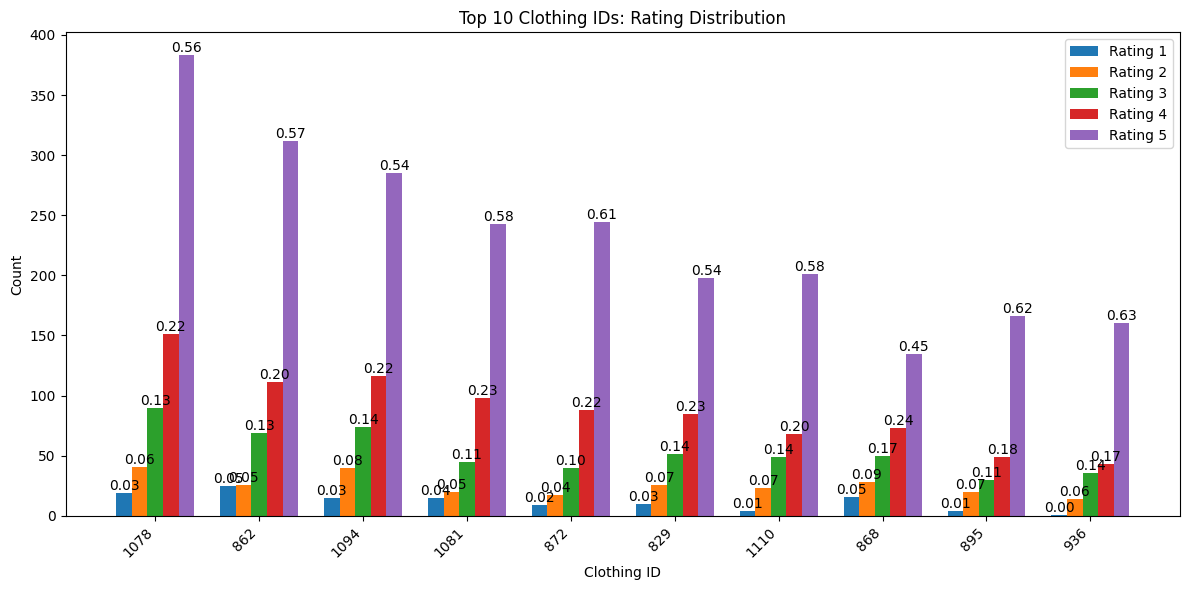

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def plot_clothing_ratings(df, top_n=10):
    """Plots the rating distribution for the top N clothing IDs."""


    rating_counts = df.groupby('clothing_id')['rating'].value_counts().unstack(fill_value=0)


    top_clothing_ids = df['clothing_id'].value_counts().nlargest(top_n).index


    top_ratings = rating_counts.loc[top_clothing_ids]

    ratios = top_ratings.div(top_ratings.sum(axis=1), axis=0)


    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.15
    x = np.arange(len(top_clothing_ids))

    for i, rating in enumerate(range(1, 6)):
        ax.bar(x + i * width, top_ratings[rating], width, label=f'Rating {rating}')
        for j, val in enumerate(top_ratings[rating]):
            ratio = ratios.iloc[j, i]
            plt.text(x[j] + i * width, val, f"{ratio:.2f}", ha='center', va='bottom')

    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(top_clothing_ids, rotation=45, ha='right')
    ax.set_xlabel('Clothing ID')
    ax.set_ylabel('Count')
    ax.set_title(f'Top {top_n} Clothing IDs: Rating Distribution')
    ax.legend()
    plt.tight_layout()
    plt.show()



plot_clothing_ratings(train2024)

In [ ]:


import pandas as pd

def plot_clothing_ratings(df, top_n=10):
    """Plots the rating distribution for the top N clothing IDs."""
    rating_counts = df.groupby('clothing_id')['rating'].value_counts().unstack(fill_value=0)
    top_clothing_ids = df['clothing_id'].value_counts().nlargest(top_n).index
    top_ratings = rating_counts.loc[top_clothing_ids]
    ratios = top_ratings.div(top_ratings.sum(axis=1), axis=0)


    table_data = []
    for clothing_id in top_clothing_ids:
        row = [clothing_id]
        for rating in range(1, 6):
          row.append(f"{ratios.loc[clothing_id, rating]:.2%}")
        table_data.append(row)

    columns = ['Clothing ID', 'Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
    print(pd.DataFrame(table_data, columns=columns))

plot_clothing_ratings(train2024)

   Clothing ID Rating 1 Rating 2 Rating 3 Rating 4 Rating 5
0         1078    2.78%    5.99%   13.16%   22.08%   55.99%
1          862    4.60%    4.79%   12.71%   20.44%   57.46%
2         1094    2.83%    7.55%   13.96%   21.89%   53.77%
3         1081    3.56%    4.75%   10.69%   23.28%   57.72%
4          872    2.26%    4.27%   10.05%   22.11%   61.31%
5          829    2.70%    7.03%   13.78%   22.97%   53.51%
6         1110    1.16%    6.67%   14.20%   19.71%   58.26%
7          868    5.30%    9.27%   16.56%   24.17%   44.70%
8          895    1.49%    7.43%   11.15%   18.22%   61.71%
9          936    0.39%    5.51%   14.17%   16.93%   62.99%


In [ ]:

def fill_with_mode(df):
    """
    Fills missing values in each column of a DataFrame with the mode of that column.
    """
    for col in df.columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
    return df
train['review_text'].fillna('unknown', inplace=True)
train['title'].fillna('unknown', inplace=True)
train['review_text'].fillna('unknown', inplace=True)
train['title'].fillna('unknown', inplace=True)
train = fill_with_mode(train)
test  = fill_with_mode(test)


<ipython-input-23-ca2139fea736>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['review_text'].fillna('unknown', inplace=True)
<ipython-input-23-ca2139fea736>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
train.shape

(16441, 10)

In [ ]:

train.drop(['age'],axis=1,inplace=True)
freq_map = train['clothing_id'].value_counts().to_dict()
train['clothing_id_freq'] = train['clothing_id'].map(freq_map)
test['clothing_id_freq'] = test['clothing_id'].map(freq_map).fillna(0)
mean_rating_map = train.groupby('clothing_id')['rating'].mean().to_dict()
global_mean = train['rating'].mean()

train['clothing_id_mean_rating'] = train['clothing_id'].map(mean_rating_map).fillna(global_mean)
test['clothing_id_mean_rating'] = test['clothing_id'].map(mean_rating_map).fillna(global_mean)


train['Text'] = train['title'] + ' ' + train['review_text']+' '+train['class_name']+' '+train['department_name']
train.drop(['title','review_text','division_name','department_name','class_name','clothing_id'],axis=1,inplace=True)

train = train.reset_index().drop('index',axis=1)
train['Text_Length'] = train['Text'].astype(str).apply(len)

test.drop(['age'],axis=1,inplace=True)

test['Text'] = test['title'] + ' ' + test['review_text']+' '+test['class_name']+' '+test['department_name']
test.drop(['title','review_text','division_name','department_name','class_name','clothing_id'],axis=1,inplace=True)
test = test.reset_index().drop('index',axis=1)
test['Text_Length'] = test['Text'].astype(str).apply(len)

In [ ]:
train.head(50)

,rating,recommended_ind,positive_feedback_count,clothing_id_freq,clothing_id_mean_rating,Text,Text_Length,Clothing_ID_Encoded
0,4,1,0,1,4.000000,unknown Absolutely wonderful - silky and sexy ...,80,4.200350
1,3,0,0,202,4.118812,Some major design flaws I had such high hopes ...,540,4.092593
2,5,1,6,4,4.000000,Flattering shirt This shirt is very flattering...,222,3.666667
3,2,0,4,213,4.323944,Not for the very petite I love tracy reese dre...,528,4.343373
4,5,1,0,202,4.118812,Flattering I love this dress. i usually get an...,193,4.092593
5,5,1,0,202,4.118812,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",394,4.092593
6,3,0,14,202,4.118812,Dress looks like it's made of cheap material D...,397,4.166667
7,5,1,2,231,4.056277,unknown This dress is perfection! so pretty an...,75,4.108571
8,5,1,2,231,4.056277,Perfect!!! More and more i find myself reliant...,529,4.005155
9,3,1,1,202,4.118812,Pretty party dress with some issues This is a ...,552,4.092593


In [ ]:
train2024.shape

(16441, 11)

In [ ]:
train.shape

(16441, 7)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np


encoded_clothing = np.zeros(train2024.shape[0])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(train2024):

    train_split = train2024.iloc[train_idx]
    val_split = train2024.iloc[val_idx]

    means = train_split.groupby('clothing_id')['rating'].mean()


    val_split_encoded = val_split['clothing_id'].map(means)


    val_split_encoded = val_split_encoded.fillna(train_split['rating'].mean())


    encoded_clothing[val_idx] = val_split_encoded


train['Clothing_ID_Encoded'] = encoded_clothing

In [ ]:
global_mean_rating = train2024['rating'].mean()
clothing_id_means = train2024.groupby('clothing_id')['rating'].mean()


test['Clothing_ID_Encoded'] = test2024['clothing_id'].map(clothing_id_means)


test['Clothing_ID_Encoded'] = test['Clothing_ID_Encoded'].fillna(global_mean_rating)

In [ ]:
test.head(50)

,recommended_ind,positive_feedback_count,clothing_id_freq,clothing_id_mean_rating,Text,Text_Length,adjectives,Clothing_ID_Encoded
0,1,4,213.0,4.323944,love it love dress sooo pretti happen find sto...,328,find i glad online petite length me- little tr...,4.323944
1,1,0,23.0,4.304348,favorit buy love love love jumpsuit fun flirti...,155,favorite fabulous great,4.304348
2,1,1,12.0,4.250000,cagrcoal shimmer fun ade basket hte last mintu...,528,last teh gorgeous mathced little baggy jkeep,4.250000
3,1,4,12.0,4.250000,shimmer surprisingli goe lot order carbon stor...,530,top skirts nice pencil flare big loose wil lig...,4.250000
4,1,0,1.0,4.000000,run big bought black xs go larkspur midi dress...,408,big black larkspur skirt stats 34a-28/29-36 ch...,4.000000
5,1,3,9.0,4.000000,nice bodi took packag want fit badli could tel...,510,fit hour-glass waist small waist nice sturdy l...,4.000000
6,1,2,9.0,4.000000,need least averag height taller materi color n...,423,least average large front imagine least averag...,4.000000
7,0,7,202.0,4.118812,look like first all pullov style side zipper p...,480,knew large bust impossible second tulle cheap ...,4.118812
8,0,0,53.0,4.415094,huge disappoint wait sweater coat ship week ex...,534,Huge arrive true short wide light weight wide ...,4.415094
9,1,0,74.0,4.229730,love it beauti made pant trend flare crop much...,117,much cuter,4.229730


In [ ]:

import spacy
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('stopwords')
def get_adjectives(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    if adjectives:
        return " ".join(adjectives)
        return ""

stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

nlp = spacy.load("en_core_web_sm")

nlp = spacy.load('en_core_web_sm')

def clean_and_stem_text_spacy(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = re.sub(r"\s+", " ", text).strip()


        doc = nlp(text)
        stemmed_text = " ".join([stemmer.stem(token.text) for token in doc])
        return stemmed_text
    else:
        return ""

train['adjectives'] = train['Text'].astype(str).apply(remove_stopwords).apply(get_adjectives)
test['adjectives'] = test['Text'].astype(str).apply(remove_stopwords).apply(get_adjectives)
train['Text'] = train['Text'].astype(str).apply(remove_stopwords).apply(clean_and_stem_text_spacy)
test['Text'] = test['Text'].astype(str).apply(remove_stopwords).apply(clean_and_stem_text_spacy)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


scaler.fit(train[['positive_feedback_count']])
scaler2 = MinMaxScaler()
scaler2.fit(test[['clothing_id_freq']])
scaler3 = MinMaxScaler()
scaler3.fit(test[['clothing_id_mean_rating']])
scaler4 = MinMaxScaler()
scaler4.fit(train[['Clothing_ID_Encoded']])

train['Clothing_ID_Encoded_scaled'] = scaler4.transform(train[['Clothing_ID_Encoded']])
test['Clothing_ID_Encoded_scaled'] = scaler4.transform(test[['Clothing_ID_Encoded']])
train['clothing_id_freq_scaled'] = scaler2.transform(train[['clothing_id_freq']])
train['clothing_id_mean_rating_scaled'] = scaler3.transform(train[['clothing_id_mean_rating']])

test['clothing_id_freq_scaled'] = scaler2.transform(test[['clothing_id_freq']])
test['clothing_id_mean_rating_scaled'] = scaler3.transform(test[['clothing_id_mean_rating']])


train['positive_feedback_count_scaled'] = scaler.transform(train[['positive_feedback_count']])
test['positive_feedback_count_scaled'] = scaler.transform(test[['positive_feedback_count']])

In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



X = train[['Clothing_ID_Encoded_scaled']]
y = train['rating'] - 1
y_categorical = to_categorical(y)


model = Sequential()
model.add(Dense(5, activation='softmax', input_shape=(X.shape[1],)))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['f1_score'])


# Train the model
model.fit(X, y_categorical, epochs=10, batch_size=32, validation_split=0.2)


# Prepare test data
X_test = test[['Clothing_ID_Encoded_scaled']]

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) + 1 #get the class with the highest probability and add 1 to revert to the original rating scale

# Print or save the predictions
predicted_classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - f1_score: 0.1186 - loss: 1.4350 - val_f1_score: 0.1421 - val_loss: 1.2629
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1428 - loss: 1.2406 - val_f1_score: 0.1421 - val_loss: 1.2182
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1436 - loss: 1.2144 - val_f1_score: 0.1421 - val_loss: 1.2133
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1430 - loss: 1.2104 - val_f1_score: 0.1421 - val_loss: 1.2128
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1434 - loss: 1.2100 - val_f1_score: 0.1421 - val_loss: 1.2131
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1436 - loss: 1.2031 - val_f1_score: 0.1421 - val_loss: 1.2126
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1435 - loss: 1.2059 - val_f1_score: 0.1421 - val_loss: 1.2123
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1430 - loss: 1.2165 - val_f1_score: 0.

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
train.head(50)

,rating,recommended_ind,positive_feedback_count,clothing_id_freq,clothing_id_mean_rating,Text,Text_Length,Clothing_ID_Encoded,adjectives,Clothing_ID_Encoded_scaled,clothing_id_freq_scaled,clothing_id_mean_rating_scaled,positive_feedback_count_scaled
0,4,1,0,1,4.000000,unknown absolut wonder silki sexi comfort inti...,80,4.200350,unknown wonderful comfortable,0.800087,0.001462,0.750000,0.000000
1,3,0,0,202,4.118812,major design flaw high hope dress realli want ...,540,4.092593,major high wanted petite small usual small sma...,0.773148,0.295322,0.779703,0.000000
2,5,1,6,4,4.000000,flatter shirt shirt flatter due adjust front t...,222,3.666667,due adjustable perfect wear cardigan,0.666667,0.005848,0.750000,0.049180
3,2,0,4,213,4.323944,petit love traci rees dress one petit feet tal...,528,4.343373,petite reese tall pretty full small embellishment,0.835843,0.311404,0.830986,0.032787
4,5,1,0,202,4.118812,flatter love dress usual get xs run littl snug...,193,4.092593,xs little snug feminine usual,0.773148,0.295322,0.779703,0.000000
5,5,1,0,202,4.118812,fun dress i m lb order petit make sure length ...,394,4.092593,petite sure wear regular less busty smaller pe...,0.773148,0.295322,0.779703,0.000000
6,3,0,14,202,4.118812,dress look like made cheap materi dress run sm...,397,4.166667,cheap small zipper tight top disappointed dres...,0.791667,0.295322,0.779703,0.114754
7,5,1,2,231,4.056277,unknown dress perfect pretti flatter dress dress,75,4.108571,unknown,0.777143,0.337719,0.764069,0.016393
8,5,1,2,231,4.056277,perfect find reliant review written savvi shop...,529,4.005155,Perfect reliant savvy right dress-if reveiws-i...,0.751289,0.337719,0.764069,0.016393
9,3,1,1,202,4.118812,pretti parti dress issu nice choic holiday gat...,552,4.092593,nice conservative enough small small small lar...,0.773148,0.295322,0.779703,0.008197


In [ ]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, make_scorer
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack, csr_matrix
from sklearn.impute import SimpleImputer

target_column='rating'
text_column='Text'
text_column2='adjectives'

best_ngram_range = (1,2)
best_max_features =15000
best_min_df = 2


tfidf_vectorizer = TfidfVectorizer(ngram_range=best_ngram_range, max_features=best_max_features, min_df=best_min_df)


X_train_text = tfidf_vectorizer.fit_transform(train[text_column])
X_test_text = tfidf_vectorizer.transform(test[text_column])

X_train = hstack([X_train_text, train[['Clothing_ID_Encoded_scaled']].values])
X_test = hstack([X_test_text, test[['Clothing_ID_Encoded_scaled']].values])

y_train=train[target_column]
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_macro_scorer = make_scorer(f1_score, average='macro')

f1_scores = cross_val_score(nb_classifier, X_resampled, y_resampled, cv=kf, scoring=f1_macro_scorer)
print(f"Mean F1 Score (Macro) across 5 folds: {np.mean(f1_scores)}")
print(f"Standard Deviation of F1 Scores: {np.std(f1_scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Mean F1 Score (Macro) across 5 folds: 0.617090353927692
Standard Deviation of F1 Scores: 0.004714791607052404


In [ ]:


import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
y_keras=y_resampled-1
model.fit(X_resampled, y_keras, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack, csr_matrix

clf1 = LogisticRegression(max_iter=200, random_state=42,solver='saga',C=1)
clf2 = MultinomialNB()


voting_clf = VotingClassifier(estimators=[('lr', clf1), ('nb', clf2)], voting='soft') # Use 'soft' for probability-based voting


voting_clf.fit(X_resampled, y_resampled)


y_pred = voting_clf.predict(X_test)
y_pred

array([5, 5, 4, ..., 5, 5, 5])

In [ ]:
submission = pd.DataFrame({
    'id': test2024['id'],
    'rating': y_pred
})
submission.to_csv("voting4.csv", index=False)

In [ ]:
logreg=LogisticRegression(max_iter=200, random_state=42,solver='saga',C=5)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
y_pred

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
submission = pd.DataFrame({
    'id': test2024['id'],
    'rating': y_pred
})
submission.to_csv("logreg20000.csv", index=False)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_mlp=to_categorical(y_resampled-1)
model.fit(X_resampled, y_mlp, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - f1_score: 0.2131 - loss: 1.5632 - val_f1_score: 0.0000e+00 - val_loss: 2.1136
Epoch 2/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1_score: 0.2746 - loss: 1.4984 - val_f1_score: 0.0000e+00 - val_loss: 2.1152
Epoch 3/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1_score: 0.2814 - loss: 1.4612 - val_f1_score: 0.0039 - val_loss: 2.0813
Epoch 4/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - f1_score: 0.2862 - loss: 1.4327 - val_f1_score: 0.0161 - val_loss: 2.0615
Epoch 5/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - f1_score: 0.3004 - loss: 1.4180 - val_f1_score: 0.0201 - val_loss: 2.0654
Epoch 6/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1_score: 0.2995 - loss: 1.4067 - val_f1_score: 0.0230 - val_loss: 2.0488
Epoch 7/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1_score: 0.3023 - loss: 1.3952 - val_f1_score: 0.0250 - val_loss: 2.0409
Epoch 8/10
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - f1_score: 0.3063 - loss: 1

In [ ]:
y_pred_proba = model.predict(X_test)
y_predmlp = np.argmax(y_pred_proba, axis=1) + 1
y_predmlp

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([5, 5, 5, ..., 5, 5, 5])

In [ ]:


from collections import Counter

rating_counts = Counter(y_pred)
rating_counts

Counter({5: 3912, 4: 1581, 3: 757, 1: 249, 2: 546})

In [ ]:
rating_counts = Counter(y_predmlp)
rating_counts

Counter({5: 4280, 4: 1480, 3: 657, 1: 278, 2: 350})

In [ ]:
submission = pd.DataFrame({
    'id': test2024['id'],
    'rating': y_predmlp
})
submission.to_csv("mlp2.csv", index=False)